# Quantum Simulator

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber = '101001'

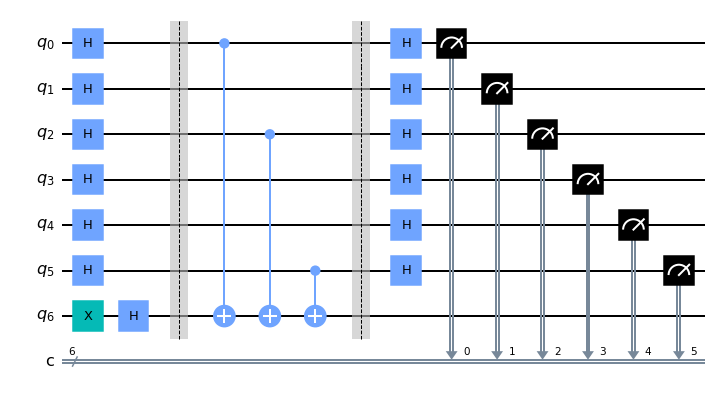

In [2]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

#Box

for ii, yesno in enumerate(secretnumber):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

#Measure

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

circuit.draw(output='mpl')

{'100101': 1024}


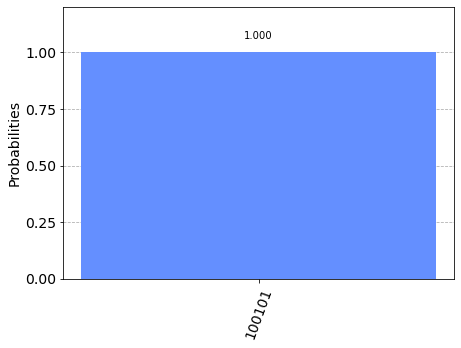

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator).result()
counts = result.get_counts()
print(counts)
from qiskit.tools.visualization import plot_histogram
plot_histogram (result.get_counts(circuit))

# Running on real Quantum Device (IBMQ)

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit,backend = qcomp,shots=10)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


{'010000': 1, '010001': 1, '010100': 1, '011001': 1, '011100': 1, '100000': 2, '100001': 1, '111100': 1, '000110': 1}


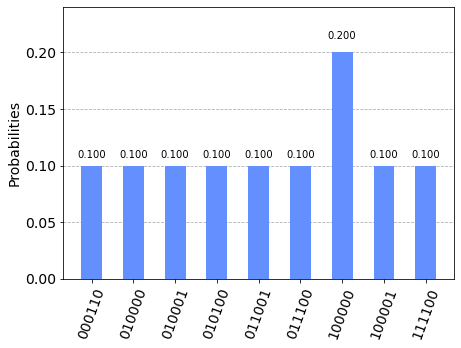

In [15]:
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(result.get_counts(circuit))